Prodigy Infotech 
Task - 5
Analyzing Traffic Accidents 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [13]:
import pandas as pd

# Load the Excel file
df = pd.read_csv("C:\\Users\\hp\\Downloads\\archive (5)\\traffic_accidents.csv")

# Preview the data
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

In [15]:
# Check for missing values
df.isnull().sum()

# Fill or drop missing values based on requirements (in this case, we don't drop any rows yet)
# If needed, you can use df.dropna() or df.fillna()

# Encode categorical variables for weather and road conditions
from sklearn.preprocessing import LabelEncoder

le_weather = LabelEncoder()
df['weather_condition_encoded'] = le_weather.fit_transform(df['weather_condition'])

le_road_condition = LabelEncoder()
df['roadway_surface_cond_encoded'] = le_road_condition.fit_transform(df['roadway_surface_cond'])

# Convert crash_hour to datetime if required (this column seems to already have numeric values for hours)
df['crash_hour'] = pd.to_datetime(df['crash_hour'], format='%H').dt.hour



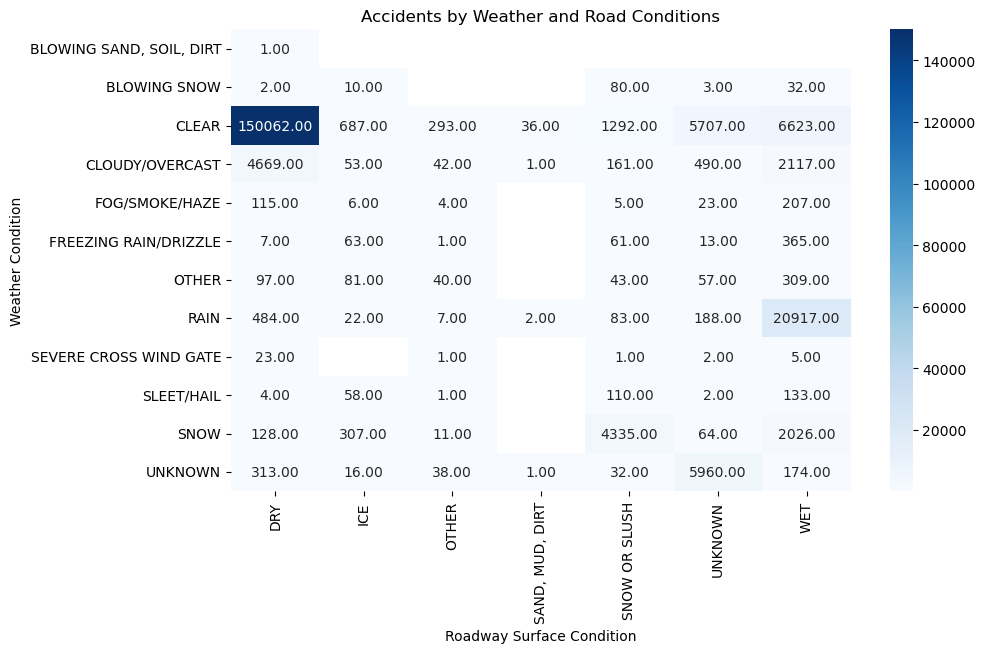

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table to examine accidents by weather and road condition
heatmap_data = pd.pivot_table(df, values='num_units', index='weather_condition', columns='roadway_surface_cond', aggfunc='count')

# Visualize the data using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='.2f')
plt.title('Accidents by Weather and Road Conditions')
plt.xlabel('Roadway Surface Condition')
plt.ylabel('Weather Condition')
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_6592\2179117210.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='crash_hour', palette='coolwarm')


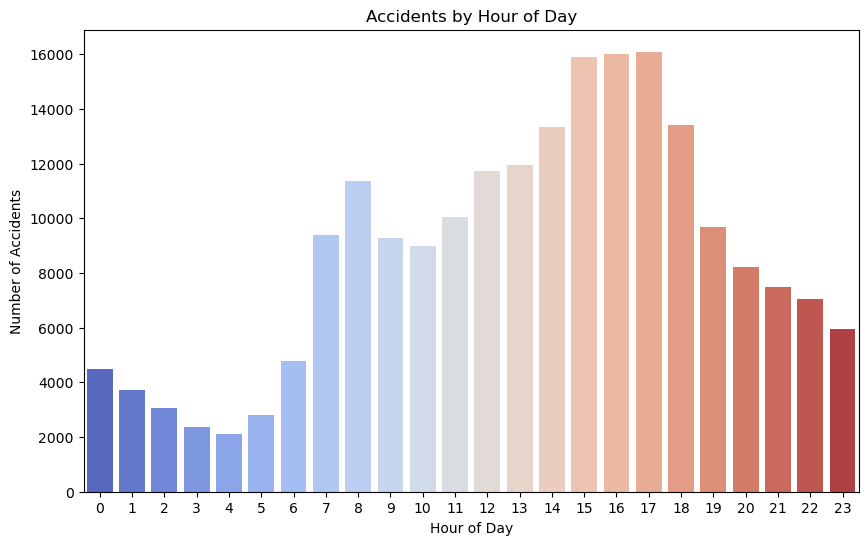

In [18]:
# Plot accident frequency by hour of the day
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='crash_hour', palette='coolwarm')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()


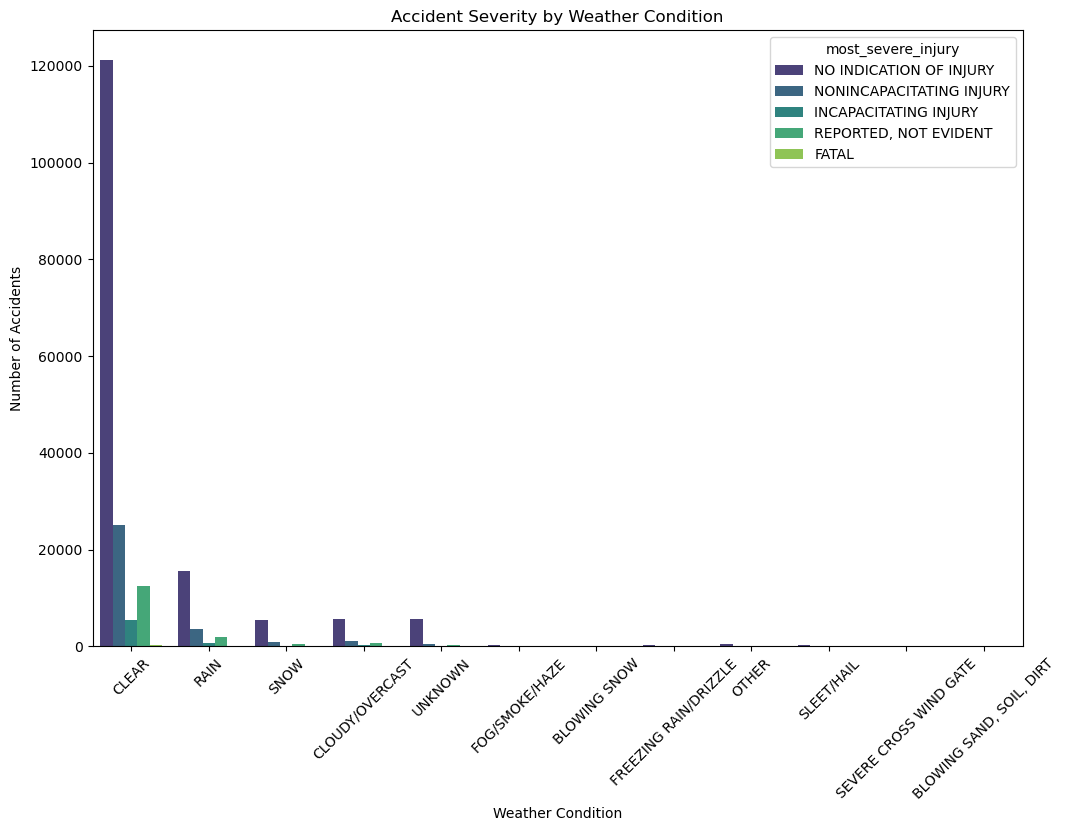

In [19]:
# Visualizing accident severity (most severe injury) by weather condition
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='weather_condition', hue='most_severe_injury', palette='viridis')
plt.title('Accident Severity by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_6592\4237437760.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='crash_day_of_week', palette='coolwarm')


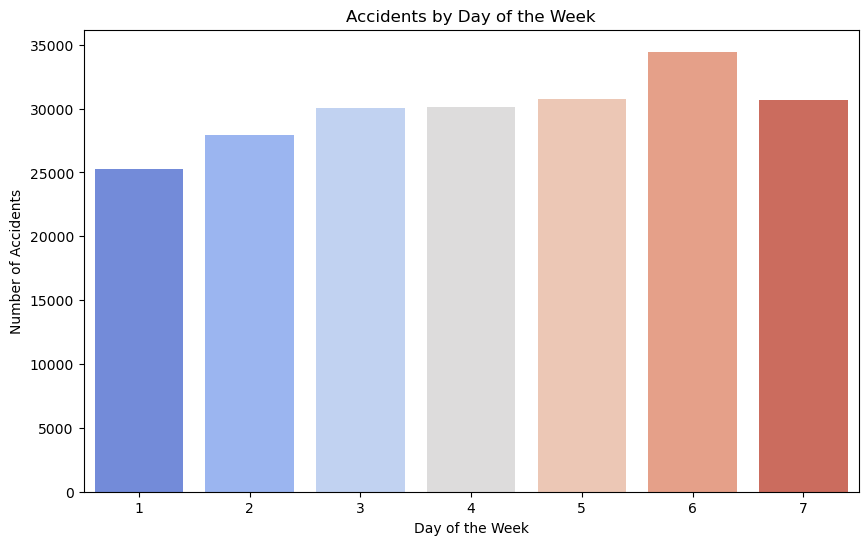

In [20]:
# Plot accident frequency by the day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='crash_day_of_week', palette='coolwarm')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()


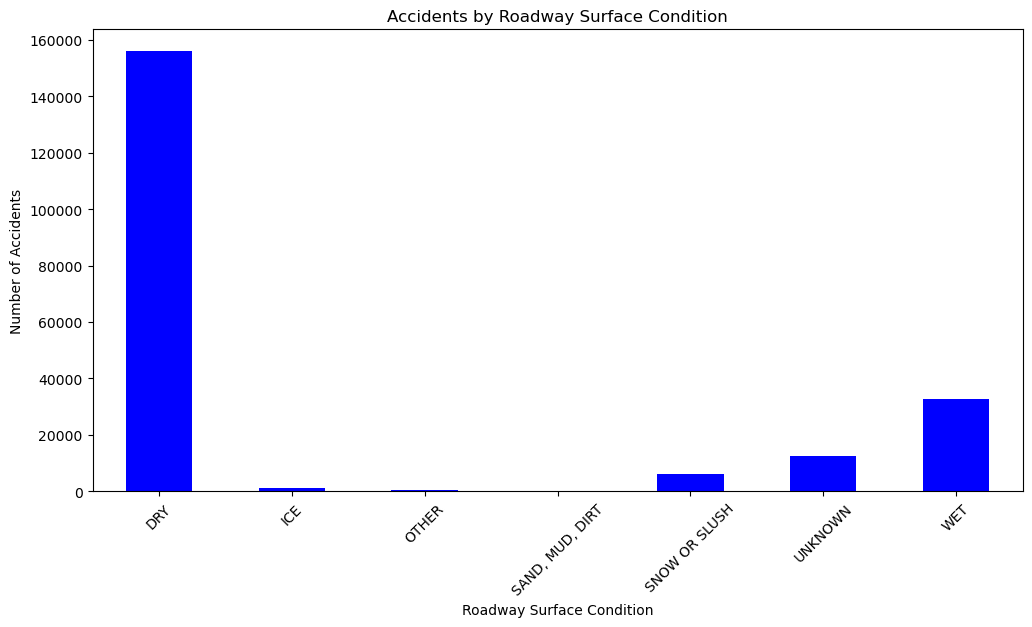

In [23]:
# Accidents by Roadway Surface Condition
accidents_by_surface = df.groupby('roadway_surface_cond').size()

# Plot the results
plt.figure(figsize=(12, 6))
accidents_by_surface.plot(kind='bar', color='blue')
plt.title('Accidents by Roadway Surface Condition')
plt.xlabel('Roadway Surface Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


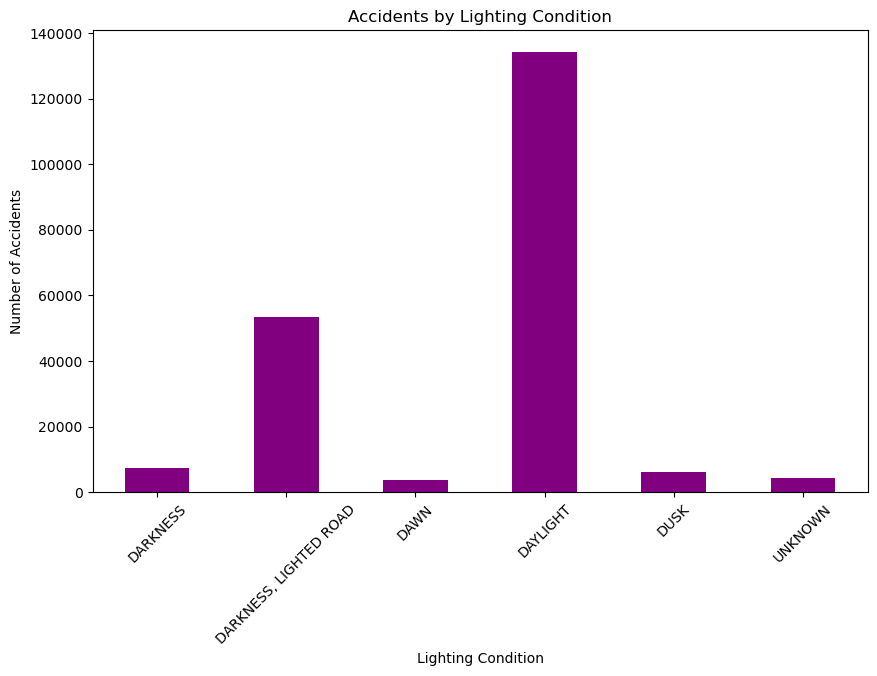

In [24]:
# Accidents by Lighting Condition
accidents_by_lighting = df.groupby('lighting_condition').size()

# Plot the results
plt.figure(figsize=(10, 6))
accidents_by_lighting.plot(kind='bar', color='purple')
plt.title('Accidents by Lighting Condition')
plt.xlabel('Lighting Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


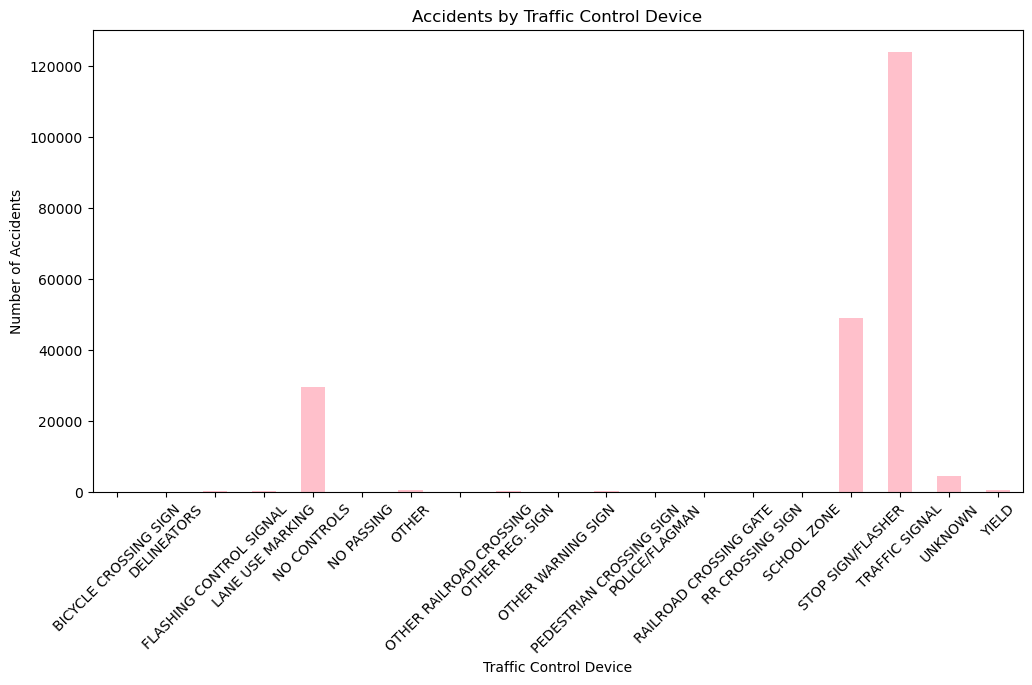

In [25]:
# Accidents by Traffic Control Device
accidents_by_traffic_control = df.groupby('traffic_control_device').size()

# Plot the results
plt.figure(figsize=(12, 6))
accidents_by_traffic_control.plot(kind='bar', color='pink')
plt.title('Accidents by Traffic Control Device')
plt.xlabel('Traffic Control Device')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


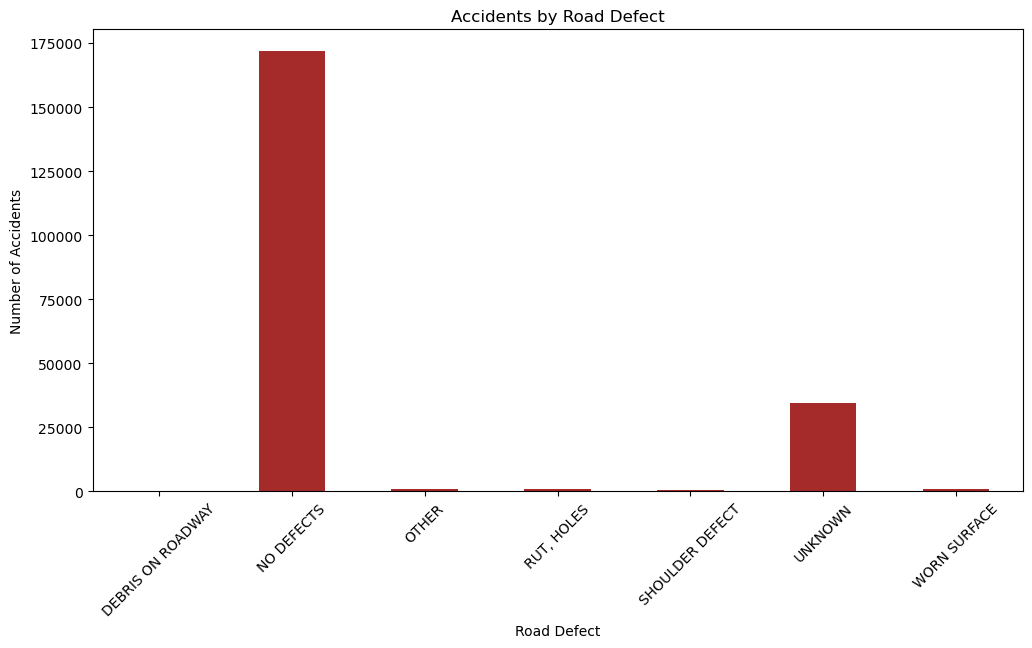

In [26]:
# Accidents by Road Defect
accidents_by_defect = df.groupby('road_defect').size()

# Plot the results
plt.figure(figsize=(12, 6))
accidents_by_defect.plot(kind='bar', color='brown')
plt.title('Accidents by Road Defect')
plt.xlabel('Road Defect')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()
